# Sensorless Drive Diagnosis Project

## Purpose of the project

<b>To build a multi-class classification model with numerical attributes</b>


The task is to classify the condition of a synchron motor by using current measurements in the motor. 

<b>Research Paper </b>

[The original paper](https://www.researchgate.net/publication/262698433_Sensorlose_Zustandsuberwachung_an_Synchronmotoren)  is in German language. [Here](https://www.researchgate.net/publication/264273485_Feature_Extraction_and_Reduction_Applied_to_Sensorless_Drive_Diagnosis) is the English version. 

After the advances in industrial information technology, condition monitoring methods are becoming increasingly important. The phase currents are used at the evaluation of the process data without additional, cost-intensive sensors and the determination the damage status of a syn-characterize chronomotors and the connected components. 


## About the dataset

<b>Dataset used in the analysis: </b> Sensorless Drive Diagnosis dataset (SDD): 

https://archive.ics.uci.edu/ml/datasets/Dataset+for+Sensorless+Drive+Diagnosis 

The dataset contains information collected from electric current drive signals of a synchronous electric motor. The current signals are measured with a current probe and an oscilloscope on two phases.

<b>Raw Data: </b> 

In the raw data there are a lot of measurements (different speeds, load moments and load forces) and different health conditions (motor ok, failure in the bearings, etc. ) 

The raw data is timeseries data. However the dataset provided are only the extracted features from the raw data. 

<b>Features and classes: </b>

There are 48 continous predictive features. The target feature contains 11 classes. 


## Setup

#### Configuration

<b>MacBook Pro 
       
       
  
  Processor 2.2 GHz Intel Core i7,   
  Memory: 16 GB 1600 MHz DDR3     
  Operation System: macOS Mojave </b> 
  
#### Versions  
  

Python.__version__  3.7.4

sklearn.__version__ 0.23.2

pandas.__version__ 0.25.1

numpy.__version__ 1.17.2

matplotlib.__version__ 3.1.1

seaborn.__version__ 0.9.0

xgboost.__version__ 0.90


### Importing Libraries

In [32]:
import time

import pandas as pd
import numpy as np
np.random.seed(42)

# plot pretty figures
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# sklearn machine learning 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

# sklearn multi layer perceptron
from sklearn.neural_network import MLPClassifier

import xgboost as xgb

### Functions 

In [2]:
# use this cell to run the python script at the same folder in the GitHub repo. 
# from print_functions import * 
#print_functions is the same as below cell. 

In [3]:

# use this cell to run the python script in the GitHub repo. 
# print_functions is in a Python script at the same folder. 
# %run -i 'print_functions.py'

In [59]:
# This cell is the same as the above cell. 
# No need to run this if you downloaded the GitHub repo. Run this if you are using only the ipynb file. 
# print_functions
def plot_coefficients(clf):
    """
        The function to plot the coefficients of logistic regression model.

        Parameters:
            clf: classifier model   
    """

    weights_clf = pd.Series(clf.coef_[0], index=scaled_X_train_log.columns.values)
    weights_clf.sort_values(inplace=True)
    plt.figure(figsize=(20, 6))
    plt.xticks(rotation=90)
    #barplot
    features = plt.bar(weights_clf.index, weights_clf.values)



def model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test):
    """
        The function to print the metrics of the model evaluation.
        Printed metrics: Accuracy scores, 
                         confusion matrixes, 
                         and classification reports for train and test sets, 

        Parameters: Train, test, and prediction values
                    X_train, X_test, 
                    y_train, y_test, 
                    y_pred_train, y_pred_test   
    """

    print('MODEL EVALUATION METRICS:\n',
          '-----------------------------------------------------')
    print('Train Set Accuracy Score', round(accuracy_score(y_train, y_pred_train), 6))
    print('Test Set Accuracy Score', round(accuracy_score(y_test, y_pred_test),6))
    print('-----------------------------------------------------\n')

    print('Confusion Matrix for train & test set: \n',
          '\nTrain set\n',
          confusion_matrix(y_train, y_pred_train), '\n'
          '\n\nTest set\n',)
    print(confusion_matrix(y_test, y_pred_test), '\n')


    print('-----------------------------------------------------')
    print('\nClassification Report for train & test set\n',
          '\nTrain set\n',
          classification_report(y_train, y_pred_train),
          '\n\nTest set\n',
          classification_report(y_test, y_pred_test))

    print('-----------------------------------------------------\n')

    # print('roc auc score for train and test set:\n ',
    #       round(roc_auc_score(y_train, y_pred_train), 4),
    #       round(roc_auc_score(y_test, y_pred_test), 4))


def plot_feature_importances(model):
    """
        The function to plot the coefficients of tree based models.

        Parameters:
            model: classifier model  
    """
    n_features = scaled_X_train.shape[1]
    plt.figure(figsize=(20, 15))
    #barplot
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), scaled_X_train.columns.values)
    plt.title('Comparison of Feature Importances')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')


## Load Dataset

In [5]:
df = pd.read_csv("sensorless_drive_diagnosis.txt", delim_whitespace=True, header=None)
header_names = ['feat' + str(i) for i in range(1, df.shape[1])]
header_names.append('class')
df.set_axis(header_names, axis=1, inplace=True)
display(df.head())
display(df.tail())
display(df.describe())

feat1         feat2     feat3     feat4         feat5     feat6  \
0 -3.014600e-07  8.260300e-06 -0.000012 -0.000002 -1.438600e-06 -0.000021   
1  2.913200e-06 -5.247700e-06  0.000003 -0.000006  2.778900e-06 -0.000004   
2 -2.951700e-06 -3.184000e-06 -0.000016 -0.000001 -1.575300e-06  0.000017   
3 -1.322600e-06  8.820100e-06 -0.000016 -0.000005 -7.282900e-07  0.000004   
4 -6.836600e-08  5.666300e-07 -0.000026 -0.000006 -7.940600e-07  0.000013   

      feat7     feat8     feat9    feat10  ...   feat40  feat41  feat42  \
0  0.031718  0.031710  0.031721 -0.032963  ... -0.63308  2.9646  8.1198   
1  0.030804  0.030810  0.030806 -0.033520  ... -0.59314  7.6252  6.1690   
2  0.032877  0.032880  0.032896 -0.029834  ... -0.63252  2.7784  5.3017   
3  0.029410  0.029401  0.029417 -0.030156  ... -0.62289  6.5534  6.2606   
4  0.030119  0.030119  0.030145 -0.031393  ... -0.63010  4.5155  9.5231   

   feat43  feat44  feat45  feat46  feat47  feat48  class  
0 -1.4961 -1.4961 -1.4961 -1.4996 -1.4996 -1.4996      1  
1 -1.4967 -1.4967 -1.4967 -1.5005 -1.5005 -1.5005      1  
2 -1.4983 -1.4983 -1.4982 -1.4985 -1.4985 -1.4985      1  
3 -1.4963 -1.4963 -1.4963 -1.4975 -1.4975 -1.4976      1  
4 -1.4958 -1.4958 -1.4958 -1.4959 -1.4959 -1.4959      1  

[5 rows x 49 columns]

feat1     feat2     feat3     feat4     feat5     feat6     feat7  \
58504 -0.000010  0.000002 -0.000021  0.000021 -0.000006 -0.000098 -0.083417   
58505 -0.000011  0.000020  0.000031 -0.000018 -0.000106  0.000292 -0.085131   
58506 -0.000006  0.000019 -0.000102 -0.000003  0.000004  0.000117 -0.081989   
58507 -0.000004  0.000034 -0.000442  0.000005  0.000007  0.000087 -0.081500   
58508 -0.000009  0.000052  0.000072  0.000010  0.000004 -0.000032 -0.083034   

          feat8     feat9   feat10  ...   feat40   feat41   feat42  feat43  \
58504 -0.083419 -0.083398 -0.18234  ... -0.52907   1.4641   7.0032 -1.5024   
58505 -0.085151 -0.085182 -0.18432  ... -0.51971   3.3275   2.3072 -1.5024   
58506 -0.082008 -0.081906 -0.18614  ... -0.51103  20.9250   9.0437 -1.5035   
58507 -0.081534 -0.081093 -0.18363  ... -0.52033   1.3890  10.7430 -1.5029   
58508 -0.083086 -0.083159 -0.18589  ... -0.50974   1.6026   4.5773 -1.5039   

       feat44  feat45  feat46  feat47  feat48  class  
58504 -1.5025 -1.5023 -1.4933 -1.4933 -1.4933     11  
58505 -1.5025 -1.5024 -1.4925 -1.4925 -1.4926     11  
58506 -1.5035 -1.5039 -1.4911 -1.4912 -1.4910     11  
58507 -1.5029 -1.5030 -1.4932 -1.4932 -1.4931     11  
58508 -1.5040 -1.5036 -1.4945 -1.4946 -1.4943     11  

[5 rows x 49 columns]

feat1         feat2         feat3         feat4         feat5  \
count  58509.000000  5.850900e+04  5.850900e+04  58509.000000  5.850900e+04   
mean      -0.000003  1.439648e-06  1.412013e-06     -0.000001  1.351239e-06   
std        0.000072  5.555429e-05  2.353009e-04      0.000063  5.660943e-05   
min       -0.013721 -5.414400e-03 -1.358000e-02     -0.012787 -8.355900e-03   
25%       -0.000007 -1.444400e-05 -7.239600e-05     -0.000005 -1.475300e-05   
50%       -0.000003  8.804600e-07  5.137700e-07     -0.000001  7.540200e-07   
75%        0.000002  1.877700e-05  7.520000e-05      0.000004  1.906200e-05   
max        0.005784  4.525300e-03  5.237700e-03      0.001453  8.245100e-04   

              feat6         feat7         feat8         feat9        feat10  \
count  5.850900e+04  58509.000000  58509.000000  58509.000000  58509.000000   
mean  -2.654483e-07      0.001915      0.001913      0.001912     -0.011897   
std    2.261907e-04      0.036468      0.036465      0.036470      0.066482   
min   -9.741300e-03     -0.139890     -0.135940     -0.130860     -0.218640   
25%   -7.379100e-05     -0.019927     -0.019951     -0.019925     -0.032144   
50%   -1.659300e-07      0.013226      0.013230      0.013247     -0.015566   
75%    7.138600e-05      0.024770      0.024776      0.024777      0.020614   
max    2.753600e-03      0.069125      0.069130      0.069131      0.352580   

       ...        feat40        feat41        feat42        feat43  \
count  ...  58509.000000  58509.000000  58509.000000  58509.000000   
mean   ...     -0.397757      7.293781      8.273772     -1.500887   
std    ...     25.018728     12.451781      6.565952      0.003657   
min    ...     -0.902350     -0.596830      0.320660     -1.525500   
25%    ...     -0.715470      1.450300      4.436300     -1.503300   
50%    ...     -0.661710      3.301300      6.479100     -1.500300   
75%    ...     -0.573980      8.288500      9.857500     -1.498200   
max    ...   3670.800000    889.930000    153.150000     -1.457600   

             feat44        feat45        feat46        feat47        feat48  \
count  58509.000000  58509.000000  58509.000000  58509.000000  58509.000000   
mean      -1.500912     -1.500805     -1.497771     -1.497794     -1.497686   
std        0.003668      0.003632      0.003163      0.003163      0.003175   
min       -1.526200     -1.523700     -1.521400     -1.523200     -1.521300   
25%       -1.503400     -1.503200     -1.499600     -1.499600     -1.499500   
50%       -1.500300     -1.500300     -1.498100     -1.498100     -1.498000   
75%       -1.498200     -1.498200     -1.496200     -1.496300     -1.496200   
max       -1.456100     -1.455500     -1.337200     -1.337200     -1.337100   

              class  
count  58509.000000  
mean       6.000000  
std        3.162305  
min        1.000000  
25%        3.000000  
50%        6.000000  
75%        9.000000  
max       11.000000  

[8 rows x 49 columns]

## Basic EDA

### Checking Missing Values

There are not any misssing values. 

In [6]:
df.isna().sum().sum()

0

### Checking the basic info

48non-null float(features), 1 non-null integer(target)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
feat1     58509 non-null float64
feat2     58509 non-null float64
feat3     58509 non-null float64
feat4     58509 non-null float64
feat5     58509 non-null float64
feat6     58509 non-null float64
feat7     58509 non-null float64
feat8     58509 non-null float64
feat9     58509 non-null float64
feat10    58509 non-null float64
feat11    58509 non-null float64
feat12    58509 non-null float64
feat13    58509 non-null float64
feat14    58509 non-null float64
feat15    58509 non-null float64
feat16    58509 non-null float64
feat17    58509 non-null float64
feat18    58509 non-null float64
feat19    58509 non-null float64
feat20    58509 non-null float64
feat21    58509 non-null float64
feat22    58509 non-null float64
feat23    58509 non-null float64
feat24    58509 non-null float64
feat25    58509 non-null float64
feat26    58509 non-null float64
feat27    58509 non-null float64


### Checking Class Sizes

There is not a class imbalance issue . All the classes have the same number of samples. Because there is not a class imbalance problem, accuracy is enough as a metric. 

We are going to check <b>precision, recall, and F1 scores </b>, but in the grid search and random search we are going to use accuracy to evaluate model performance. 

We are not going to calculate <b>F-Beta score</b> and <b>Cohen's Kappa score </b>  in this project. 

In [8]:
df.groupby('class').size()

class
1     5319
2     5319
3     5319
4     5319
5     5319
6     5319
7     5319
8     5319
9     5319
10    5319
11    5319
dtype: int64

### Seperating Target and Features

In [9]:
X = df.drop(['class'], axis=1)
y = df['class']

### Making a random sample 


In [10]:
df_sample = df.sample(500)

## Data Visualizations

### Histograms
Results of the histograms: There are a lot of features that have exact same distribution. There can be a high correlation between features. For example <b>feat24</b>, <b>feat25</b>, <b>feat26</b>, <b>feat27</b> are the same. 

A heatmap can help us see the amount of correlation. 

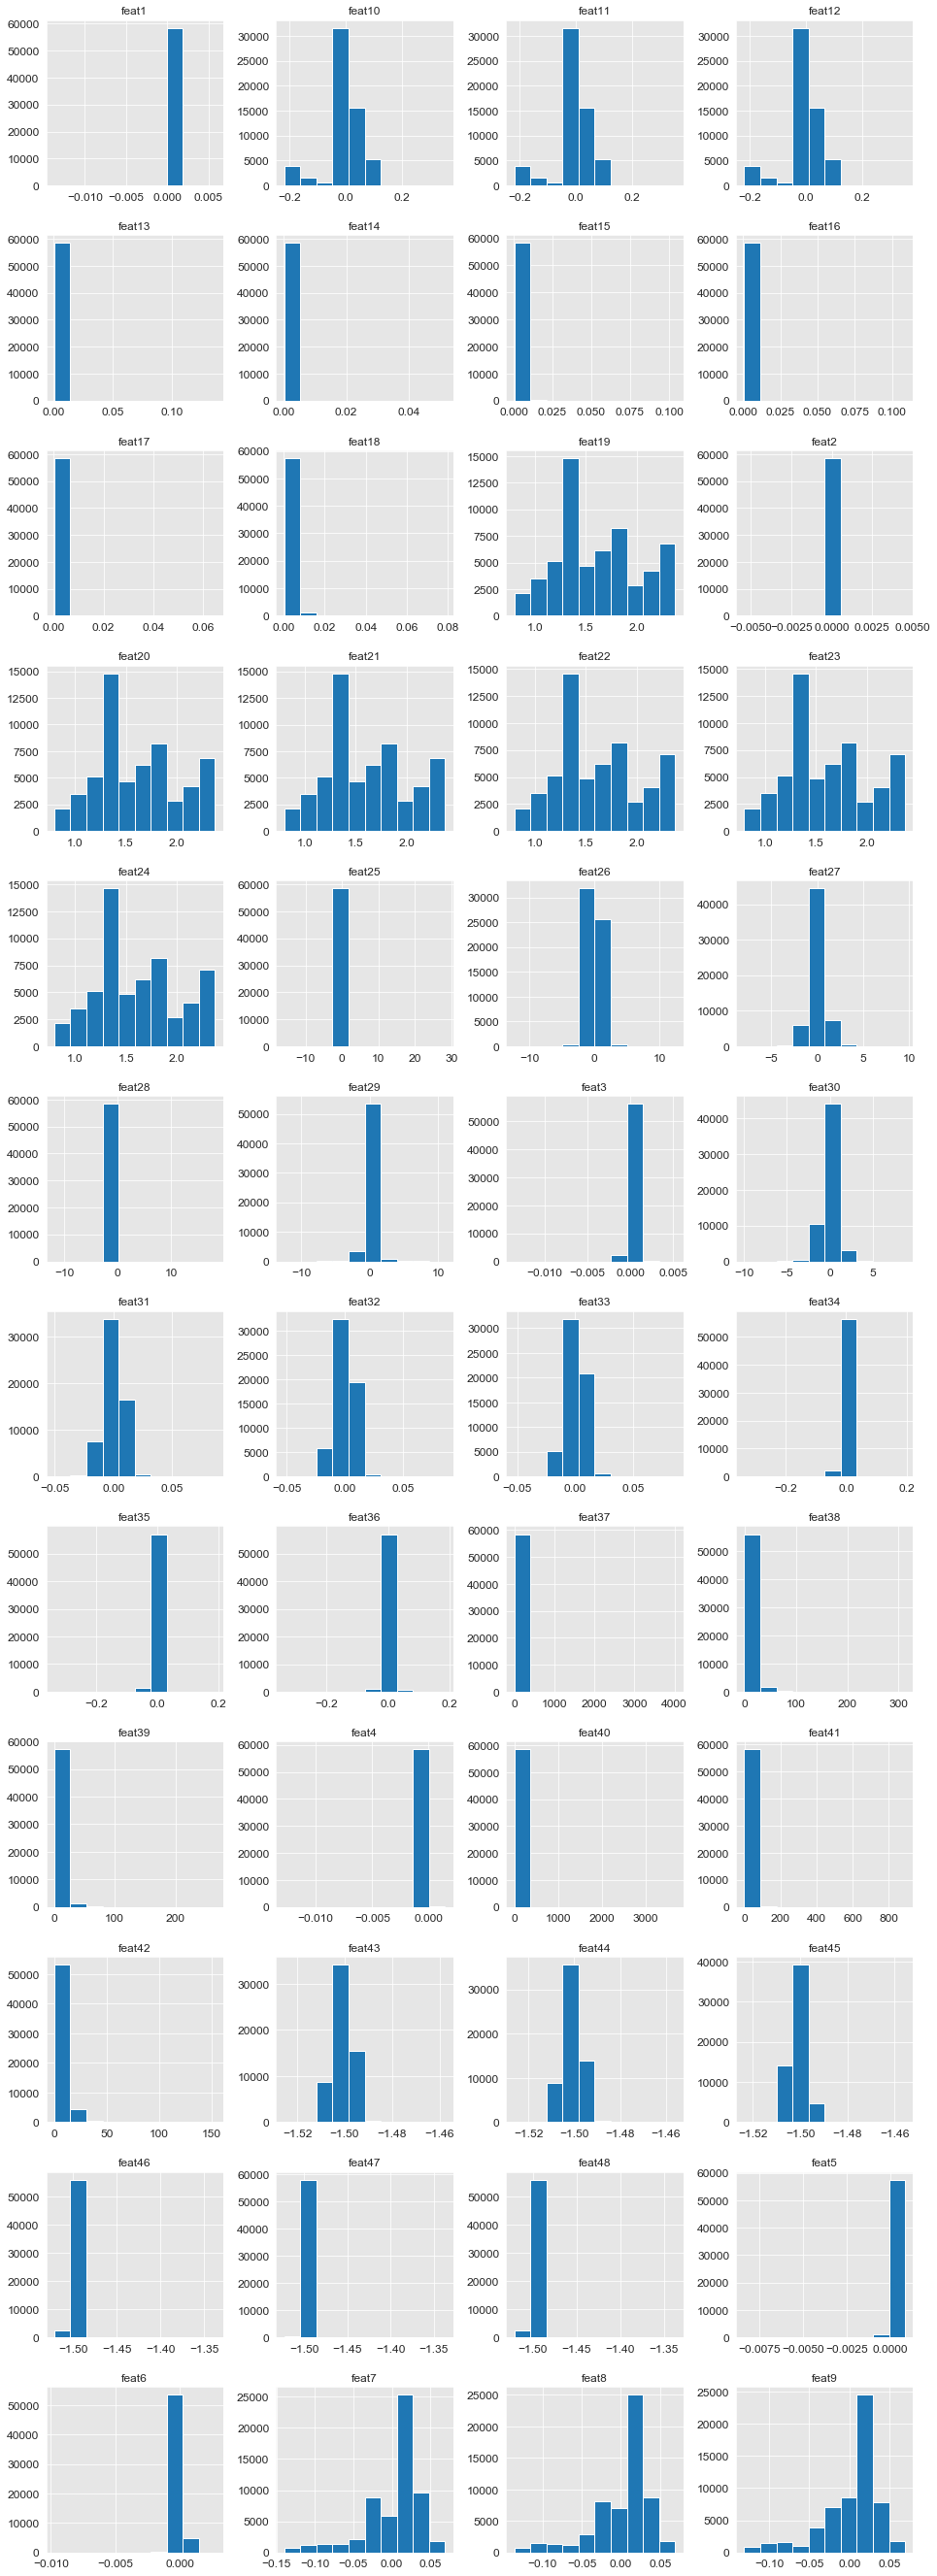

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 48
plt.rcParams["figure.figsize"] = fig_size
# plt.figure(figsize=(16,48))
X.hist(layout=(12,4))
plt.show()


### Heatmaps

Heatmap with annotations show the correlated columns and the amount of correlation. 

#### Heatmap 1
At the below map, <b>18 columns</b> are 100% correlated to each other. Dropping them in the beginning of the analysis. 


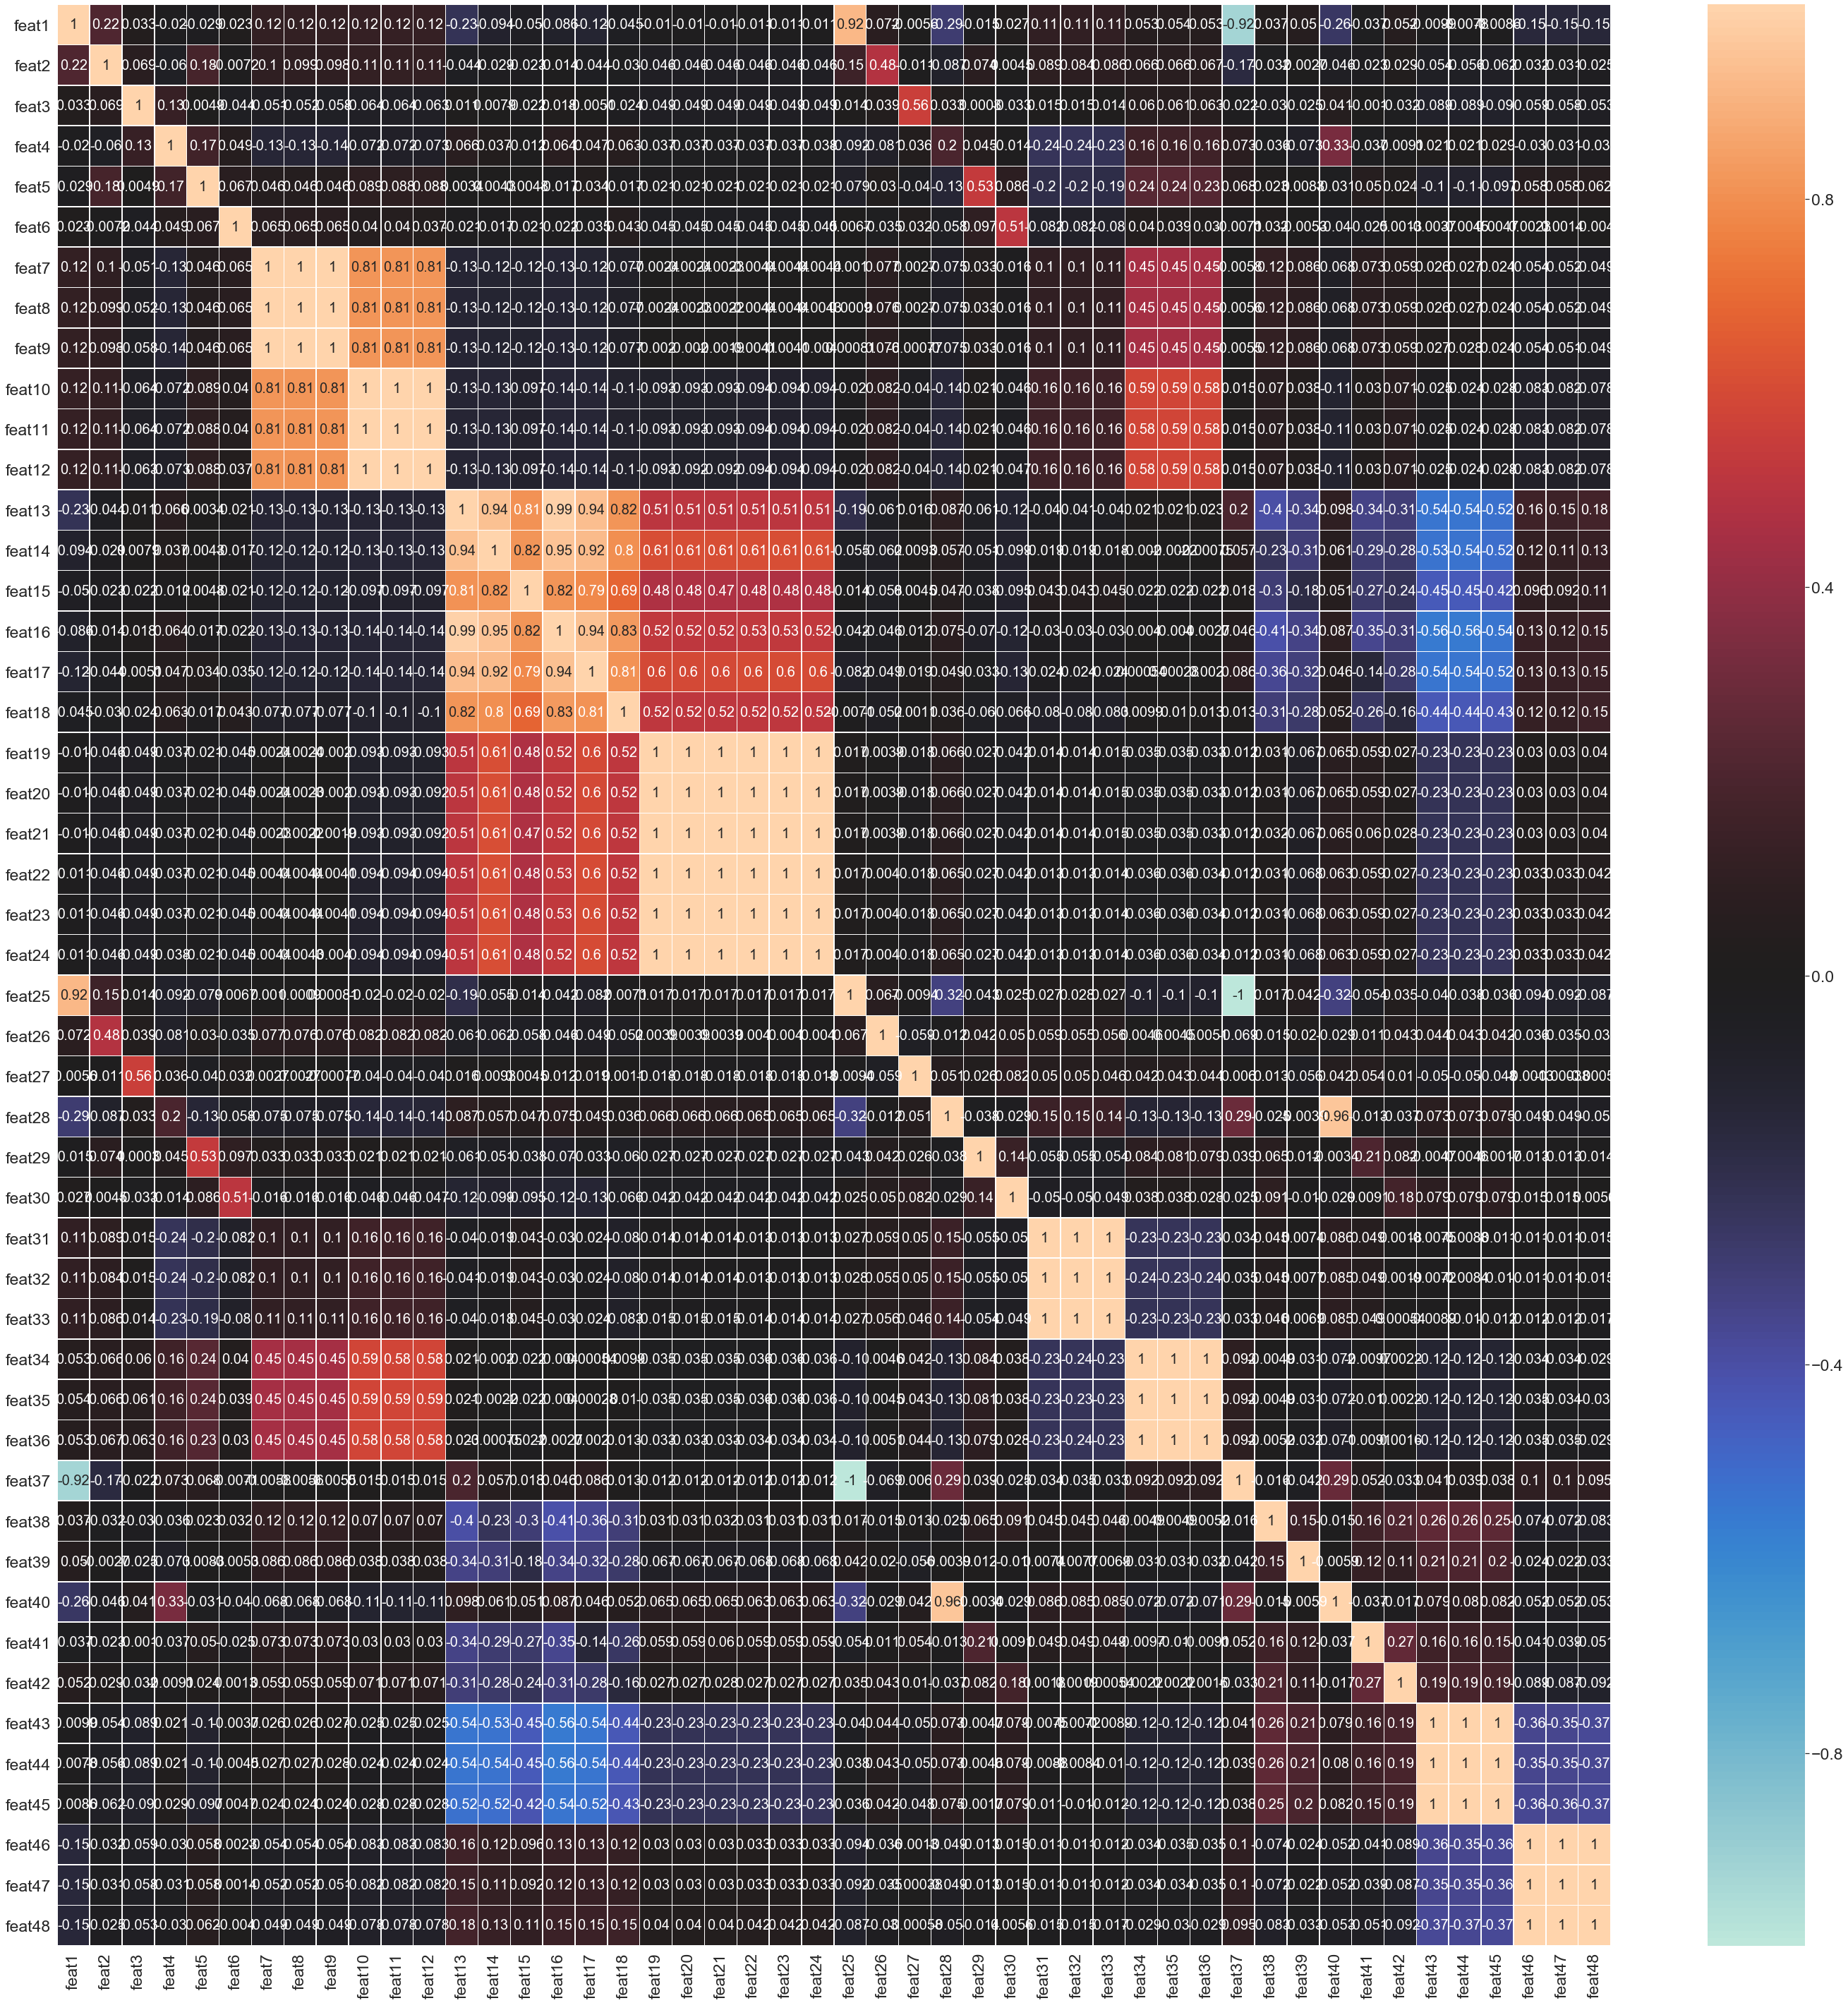

In [26]:
df_heatmap = df_sample.drop(['class'], axis=1)
plt.figure(figsize=(40, 40))
ax = sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5, annot=True, annot_kws={"size": 20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()
plt.show()

#### Dropping Correlated Columns

18 columns are dropped, 30 columns are kept

In [13]:
# 100% correlated columns are dropped
columns_to_drop = ['feat8', 'feat9', 'feat11', 'feat12', 'feat16',
                   'feat20','feat21','feat22','feat23','feat24', 
                   'feat32','feat33','feat35', 'feat36',
                   'feat44','feat45','feat47','feat48']
df = df.drop(columns_to_drop, axis=1)

#### Heatmap 2

According to the heatmap below, there are not 100% correlated columns but <b>feat13</b>, <b>feat15</b>, <b>feat17</b> are also highly correlated to <b>feat14</b>. They can affect the logistic regression model. 

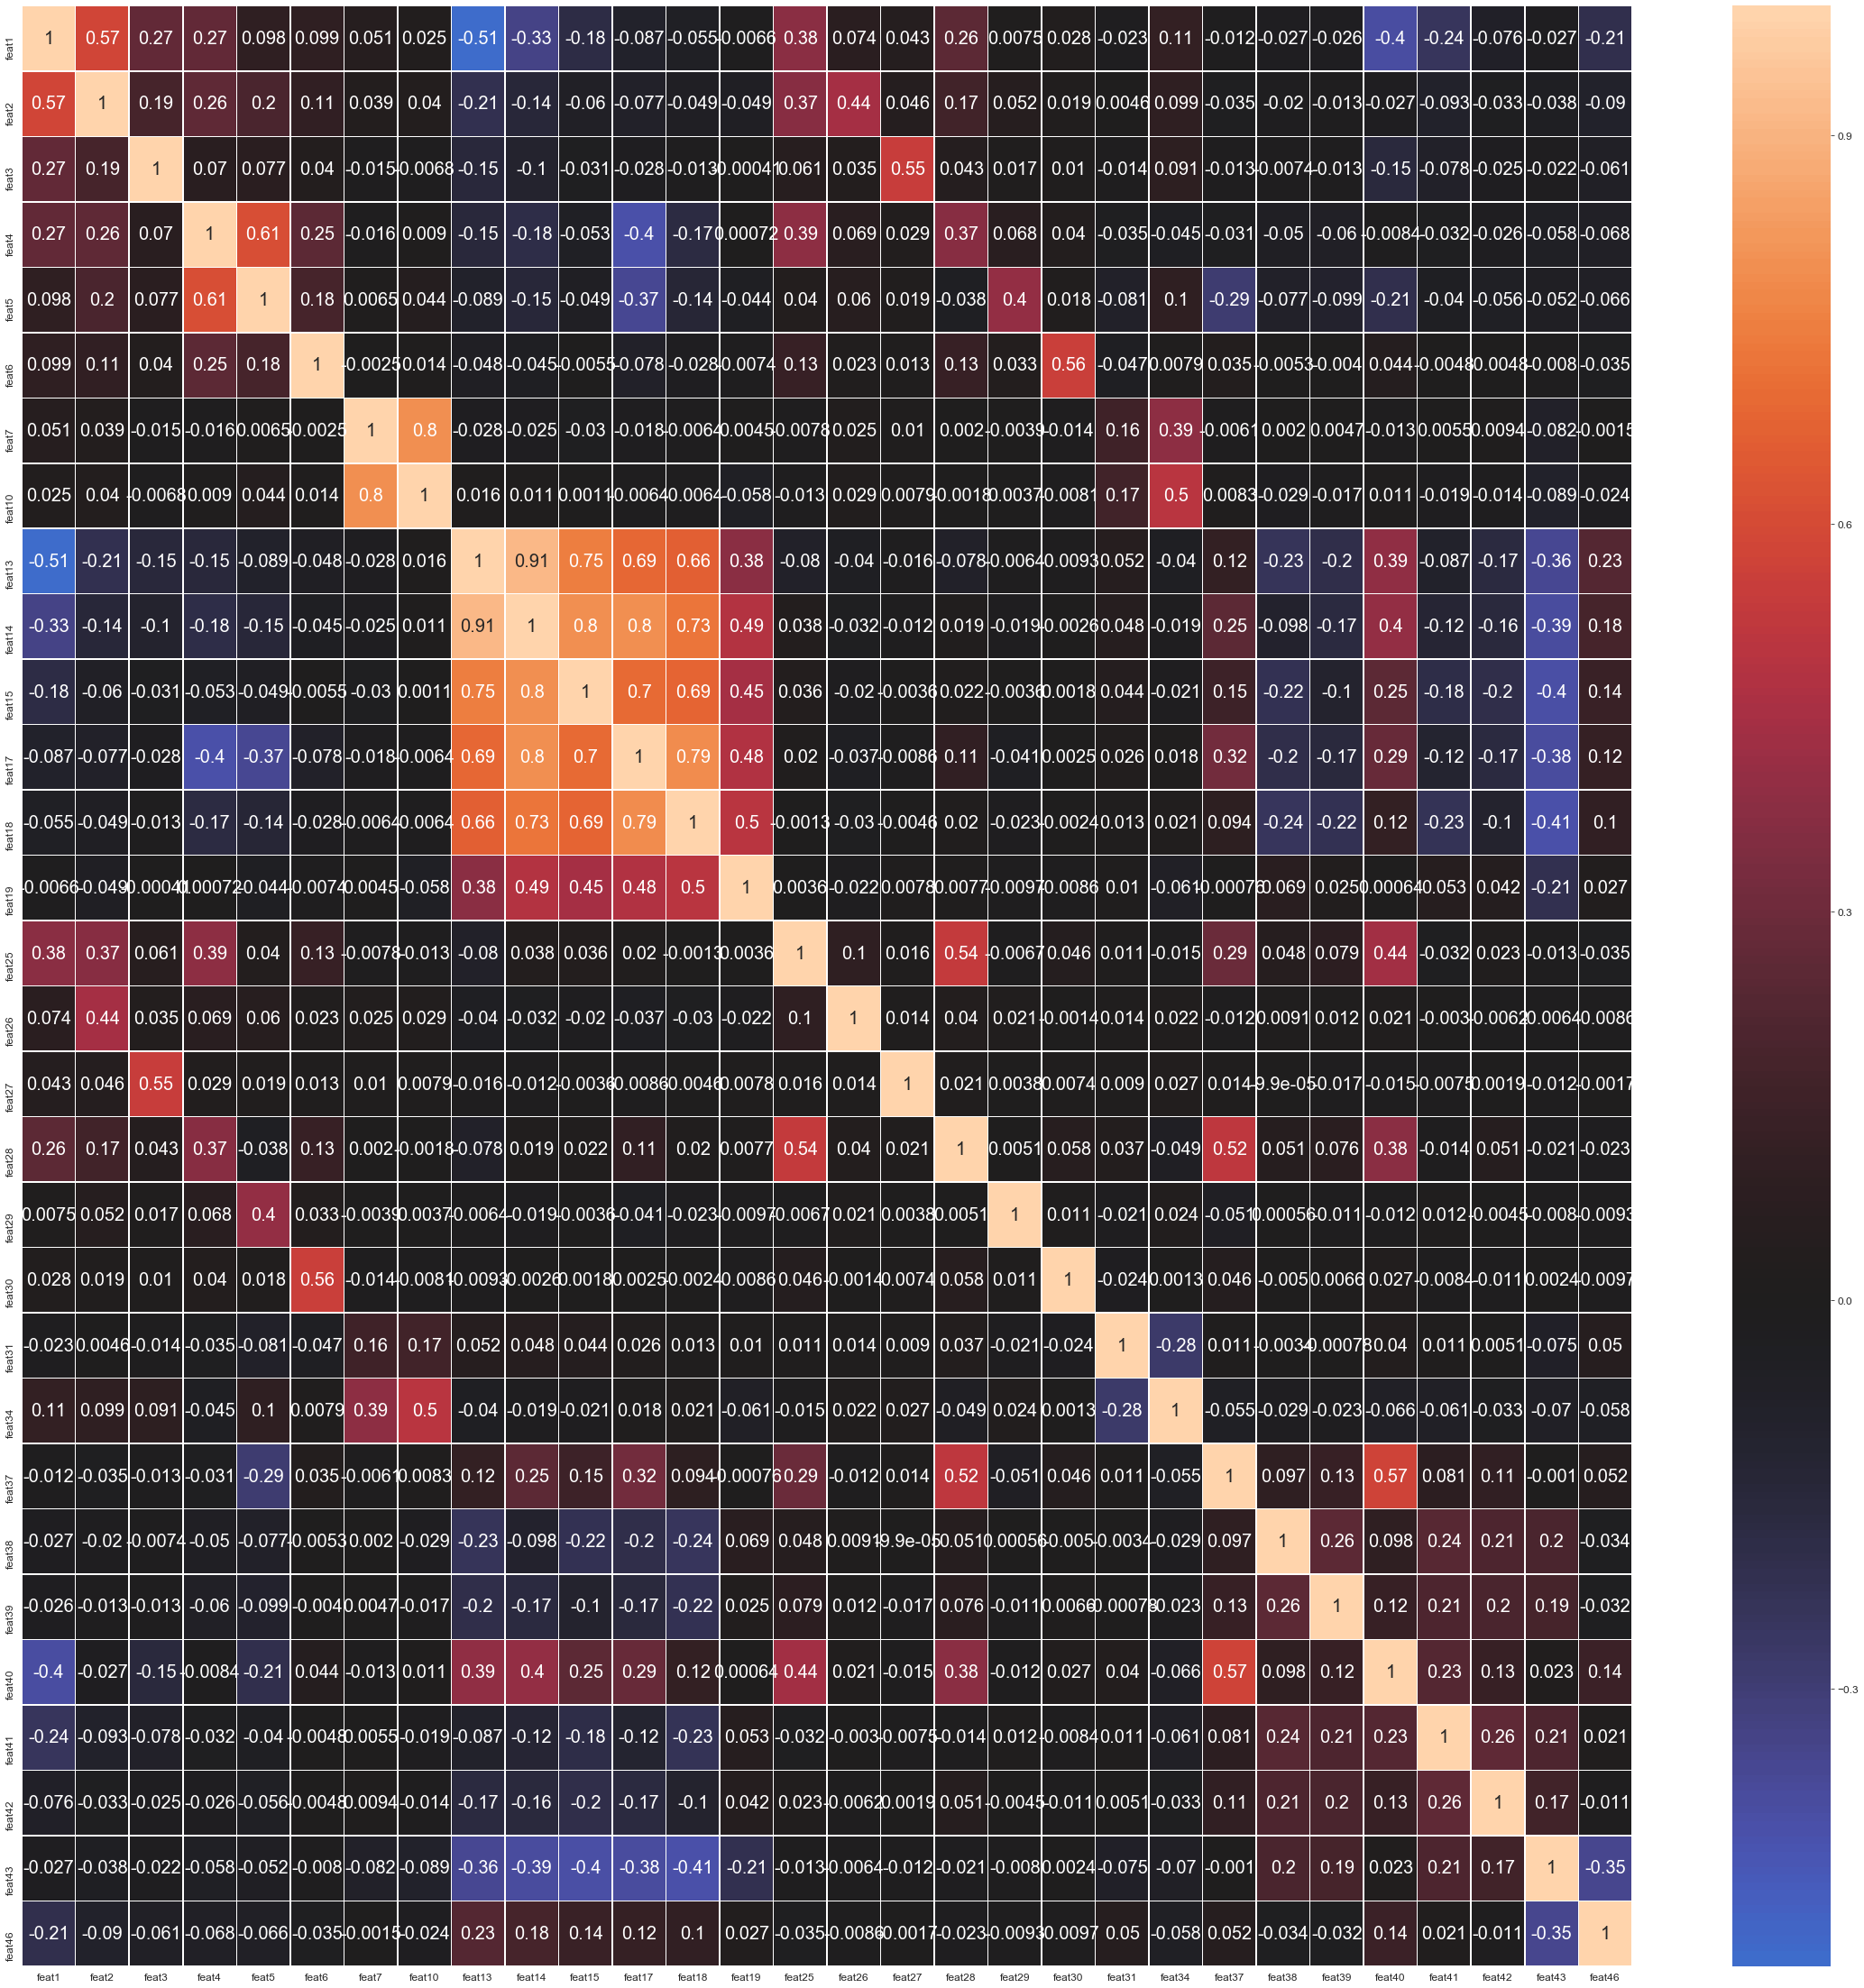

In [14]:
df_heatmap = df.drop(['class'], axis=1) # dropping target columns and making correlation heatmap of features. 
plt.figure(figsize=(40, 40)) 
ax = sns.heatmap(df_heatmap.corr(), center=0, linewidths=.5, annot=True, annot_kws={"size": 20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) # this line is to fix a bug at the heatmap
plt.show()

#### Boxplots

##### Seperating target and features after dropping columns

In [15]:
X = df.drop(['class'], axis=1)
y = df['class']

##### Scaling Features To Get Better Boxplots (MinMax Scaler)

In [16]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
# scaled_X = pd.DataFrame(scaled_x_train, columns=X_train.columns)

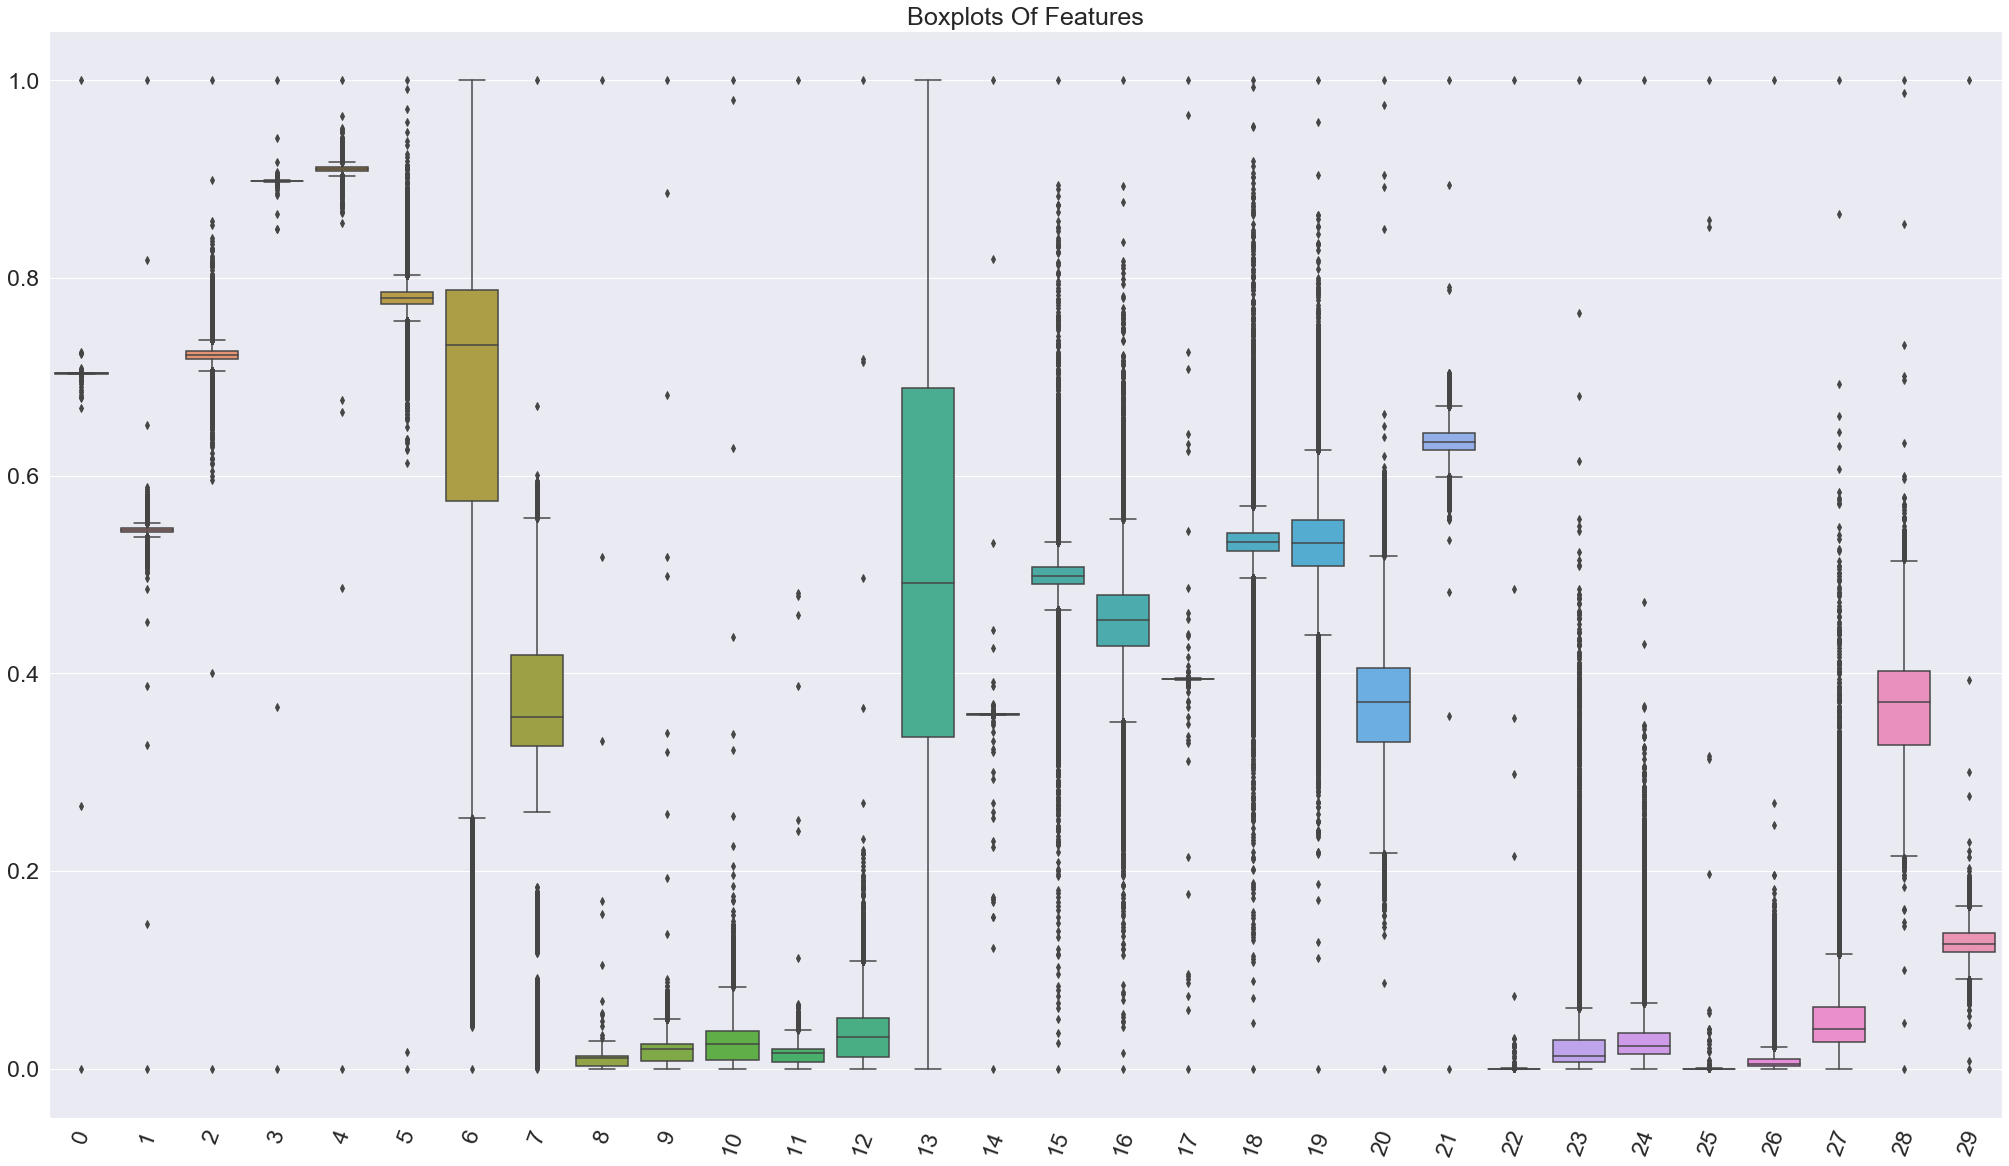

In [17]:
sns.set(rc={'figure.figsize': (35, 20)},font_scale=2.1)  # Set font scale   
g = sns.boxplot(data=scaled_X)
for item in g.get_xticklabels():  # Rotate x labels to 70 degrees angle
    item.set_rotation(70)
plt.title('Boxplots Of Features');

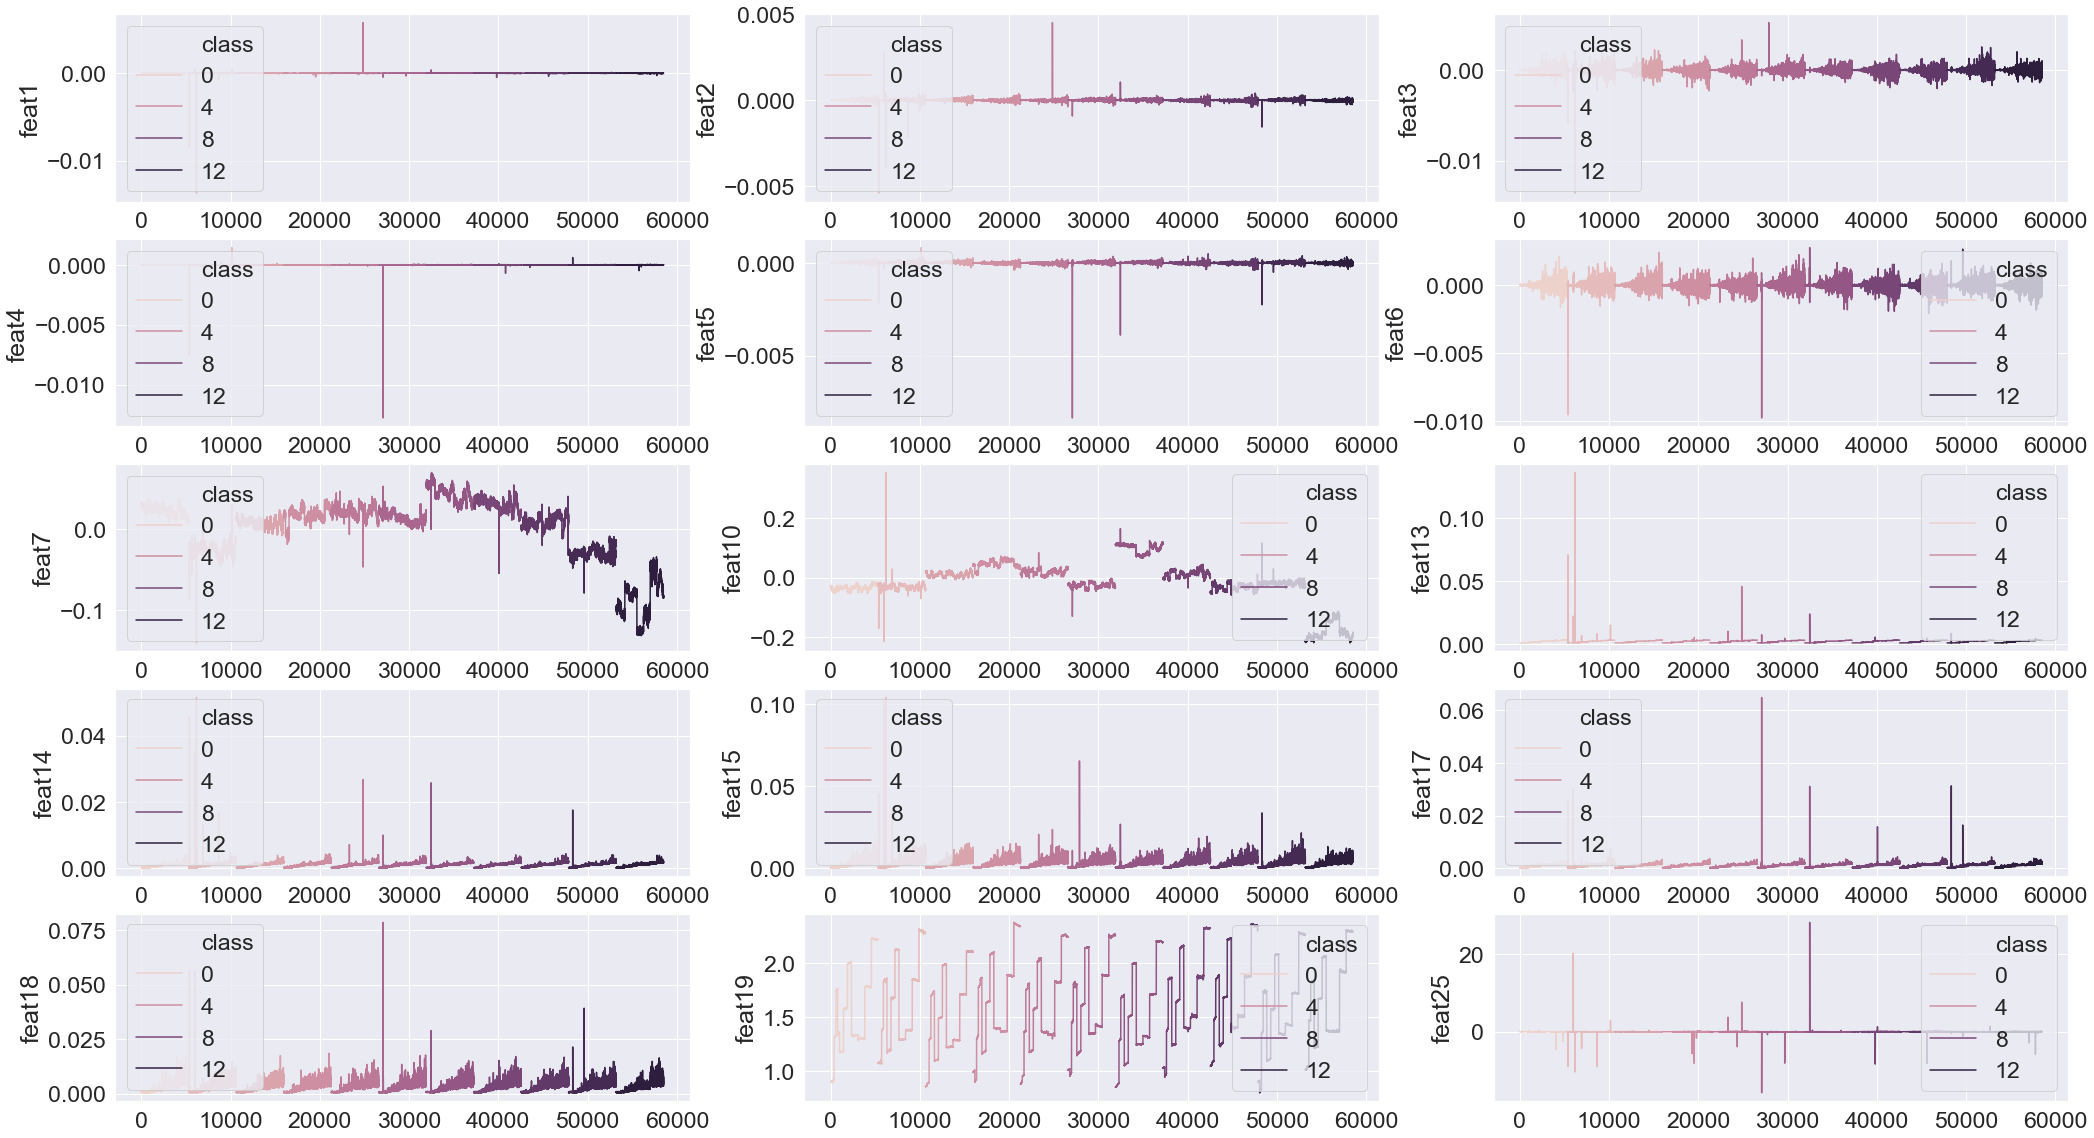

In [18]:
selected_features = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 
                     'feat6', 'feat7', 'feat10', 'feat13', 'feat14', 
                     'feat15', 'feat17', 'feat18', 'feat19', 'feat25']
    
fig, ax = plt.subplots(5, 3)
for variable, subplot in zip(selected_features, ax.flatten()):
    sns.lineplot(df.index, df[variable], ax=subplot, hue=df['class'])

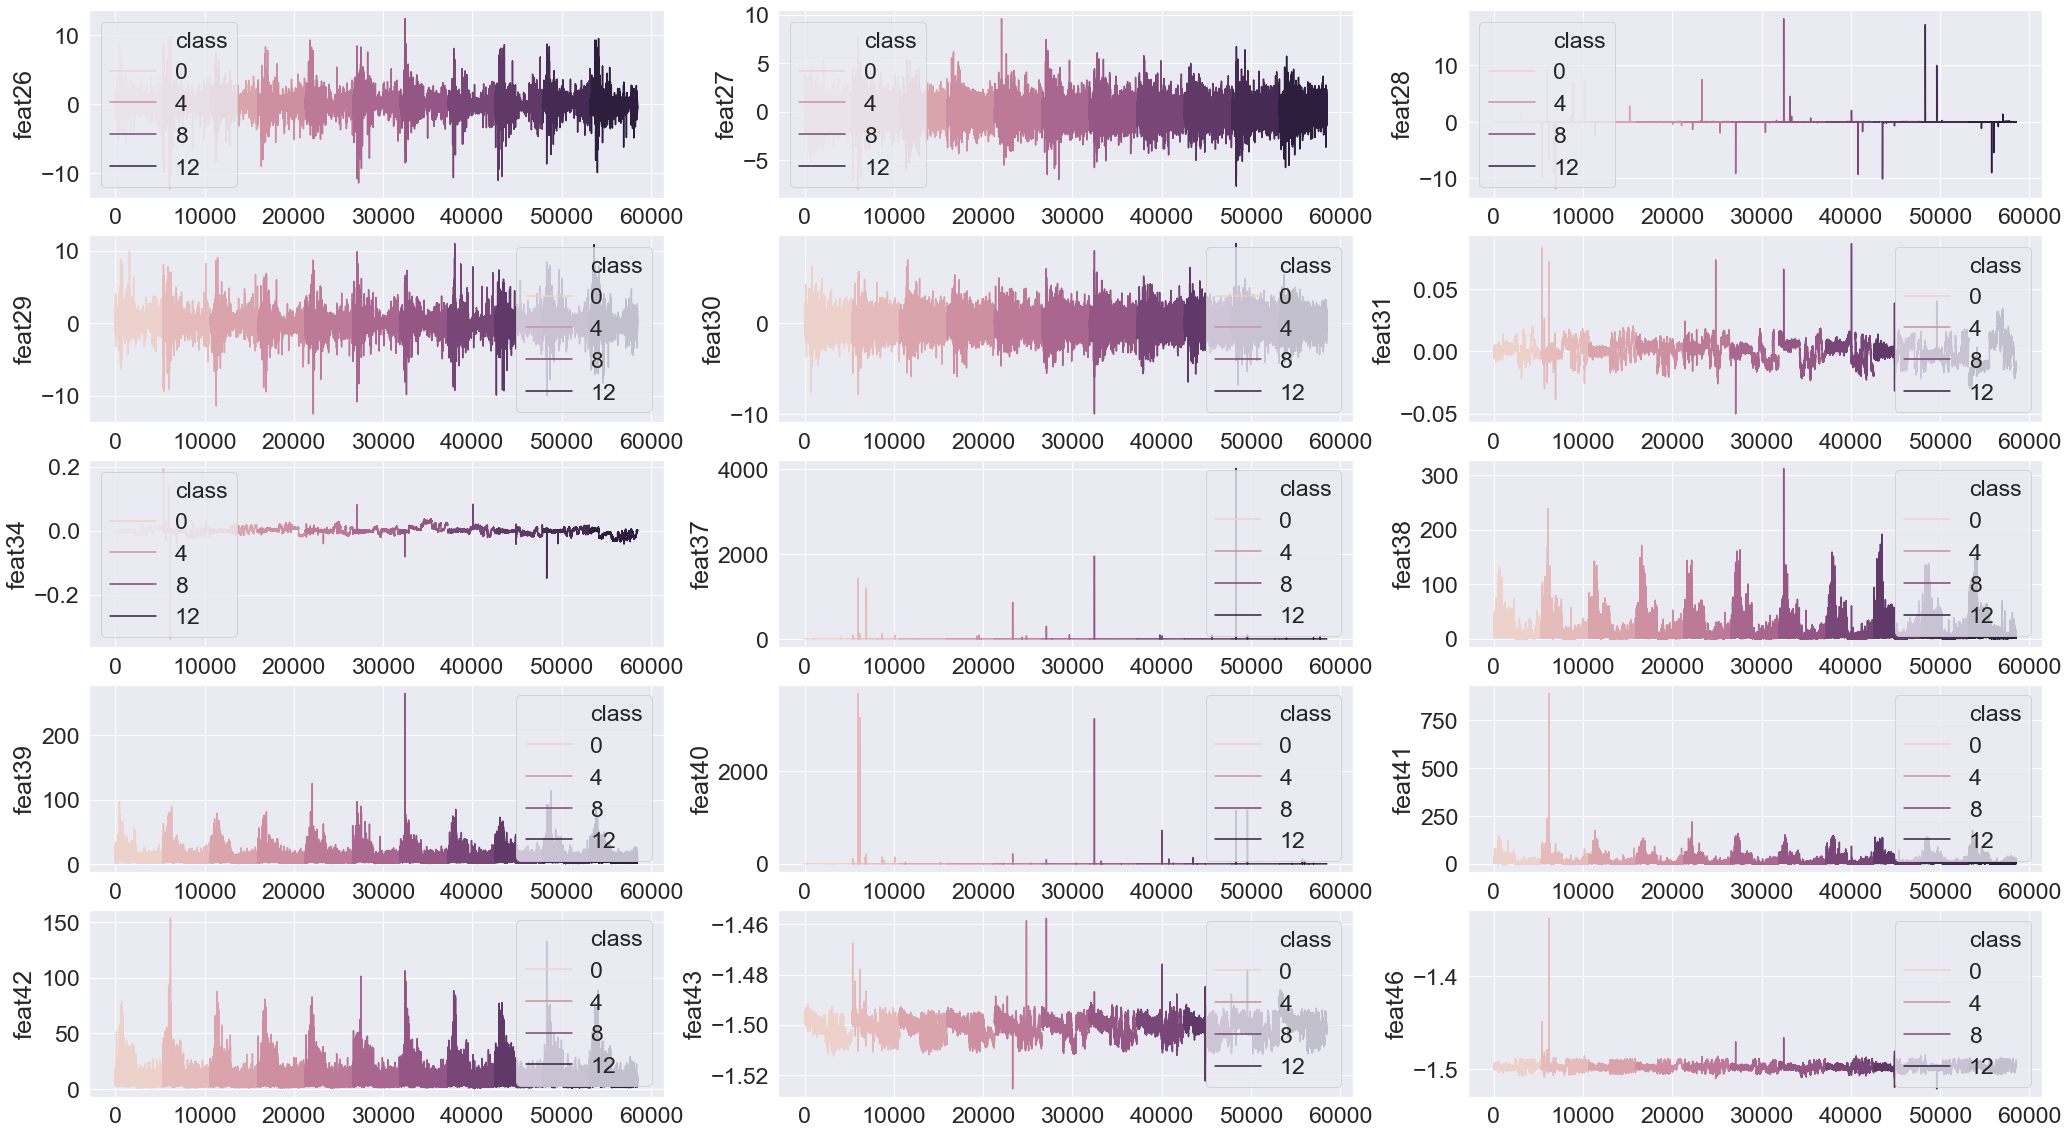

In [19]:
selected_features = ['feat26', 'feat27', 'feat28', 'feat29', 'feat30', 
                     'feat31', 'feat34', 'feat37', 'feat38', 'feat39', 
                     'feat40', 'feat41', 'feat42', 'feat43', 'feat46']
    
fig, ax = plt.subplots(5, 3)
for variable, subplot in zip(selected_features, ax.flatten()):
    sns.lineplot(df.index, df[variable], ax=subplot, hue=df['class'])


## Modelling 

### Models in this notebook: Logistic Regression, Random Forest Classifier, XGBoost Classifier, Multi Layer Perceptron

I decided to use logistic regression as a baseline model. 

I chose random forest and XGBoost as main models. Because they are good at handling complex, non-linear relationships.

I added a multiclass perceptron as a deep learning model. 


### Splitting The Data Into Test and Train Sets

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

### Scaling Training Data for Logistic Regression Model (Standard Scaler)

In [28]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_test.columns)

### Baseline Model: Logistic Regression

In [29]:
scaled_X_train_log = scaled_X_train.drop(['feat13', 'feat15', 'feat17' ], axis=1)
scaled_X_test_log = scaled_X_test.drop(['feat13', 'feat15', 'feat17'], axis=1)

In [30]:
log = LogisticRegression(solver='saga', max_iter=5000, penalty=l1) #LASSO penalty 
log.fit(scaled_X_train_log, y_train)
y_pred_train = log.predict(scaled_X_train_log)
y_pred_test = log.predict(scaled_X_test_log)

#### Model Evaluation Metrics

In [36]:
model_evaluation(scaled_X_train_log, scaled_X_test_log, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Train Set Accuracy Score 0.906595
Test Set Accuracy Score 0.904375
-----------------------------------------------------

Confusion Matrix for train & test set: 
 
Train set
 [[4056    0    0    0    0  164    0    0   25    0    0]
 [   0 3745    0    0    0    2    0    0   13  470    0]
 [   0    0 4075  102   98    0    0    0    0    0    0]
 [   0    0  176 3968   69    0   52    6    0    0    0]
 [   0    0  122  160 3359    1    0  611    0    0    0]
 [ 255    6    6    0    3 3479    0    1  512    0    0]
 [   0    0    0   12    0    0 4204    0    0    0    0]
 [   2    1   13   17  351    3    3 3900    0    0    0]
 [  40   18   18    1    0  524    0    2 3699    5    0]
 [   0  506    0    0    1    0    0    0    1 3739    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 


Test set

[[1027    0    0    0    0   42    0    0    5    0    0]
 [   1  957    0    0    1    0   

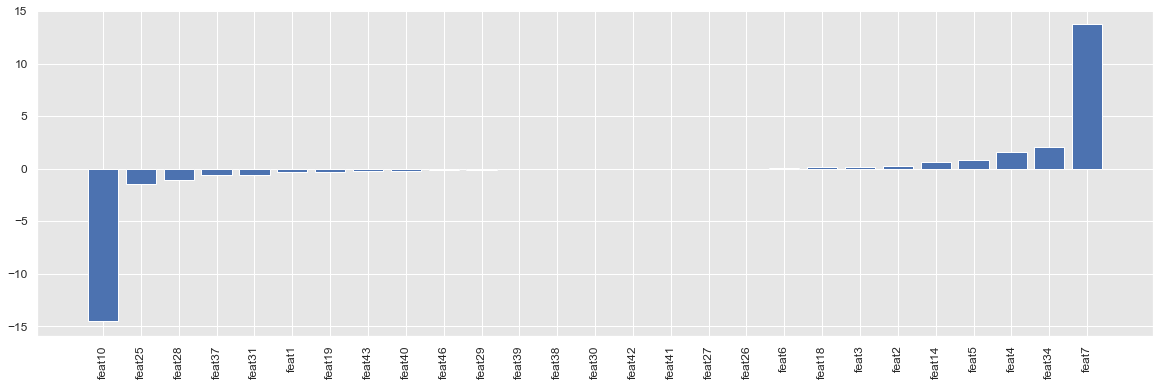

In [48]:
plot_coefficients(log)

#### Results of Logistic Regression

##### Assumptions of Logistic Regression

Logitic Regression has normality, linearity, and homoscedasticity assumptions. We can make log normalization to have a more normal distribution. We can check the residuals for homoscedasticty. 

##### Feature Selection

We should get rid of outliers that have too much influence and leverage. We should eliminate the correlated columns by Variance Inflation Factor(VIF) or Predictive Power Score(PPS). We can also use Lasso and Ridge penalties for feature selection. We can apply other filter or wrapper methods. 

Because this is my vanilla model, I decided to continue with other models. 

### Random Forest Classification Model

In [38]:
rf_clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=42, n_estimators= 80)
rf_clf.fit(X_train, y_train)
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

In [39]:
model_evaluation(X_train, X_test, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Train Set Accuracy Score 1.0
Test Set Accuracy Score 0.998376
-----------------------------------------------------

Confusion Matrix for train & test set: 
 
Train set
 [[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4230    0    0    0    0    0    0    0    0    0]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4271    0    0    0    0    0    0    0]
 [   0    0    0    0 4253    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    0    0    0    0    0    0 4290    0    0    0]
 [   0    0    0    0    0    0    0    0 4307    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 


Test set

[[1070    0    0    0    0    4    0    0    0    0    0]
 [   0 1086    0    0    0    0    0   

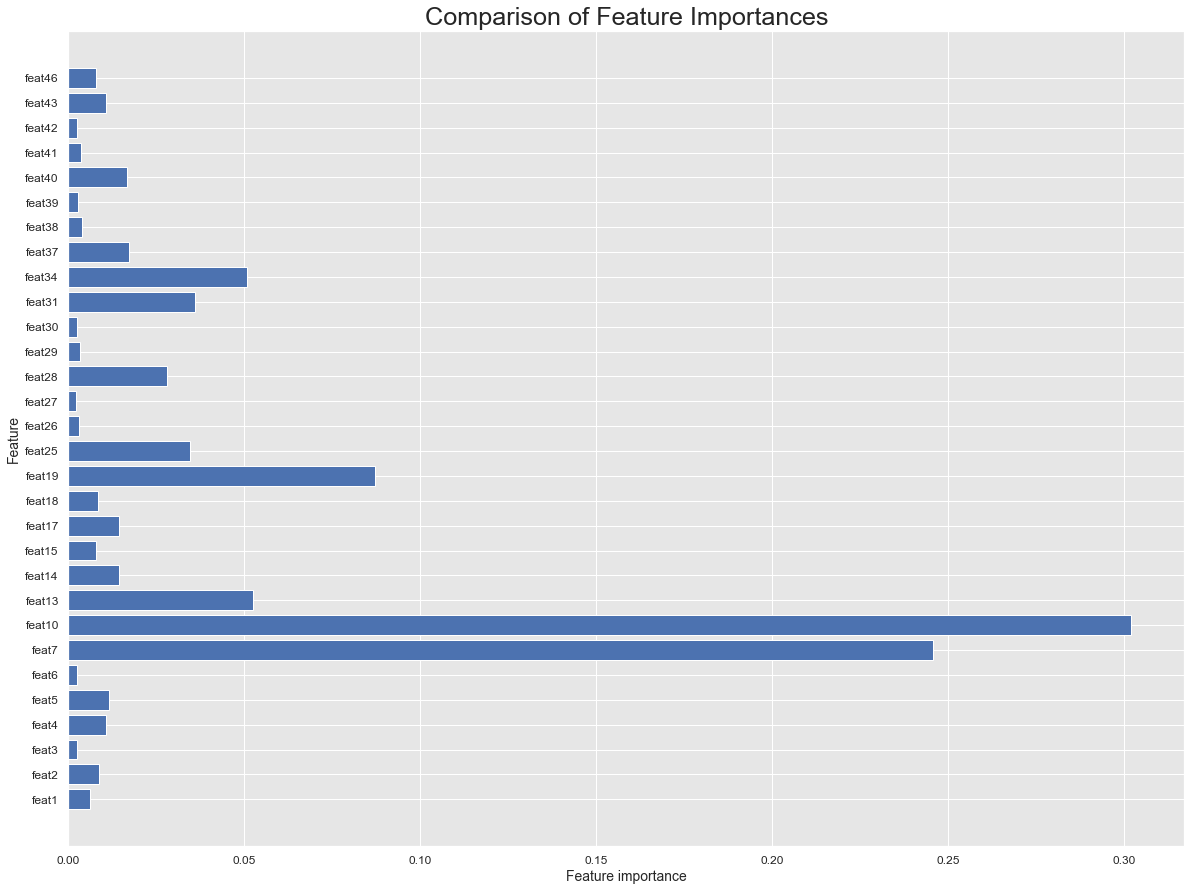

In [40]:
plot_feature_importances(rf_clf)

### Feature Selection After Two Models

In [51]:
scaled_X_train = scaled_X_train.drop(['feat3', 'feat6', 'feat27','feat30', 'feat39', 'feat42' ], axis=1)
scaled_X_test = scaled_X_test.drop(['feat3', 'feat6', 'feat27','feat30', 'feat39', 'feat42' ], axis=1)

### Pipeline and Grid Search - Random Forest Classification Model

In [53]:
pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[100, 120, 150],
         'classifier__max_depth': [12, 14],
         'classifier__min_samples_split': [4, 6, 8]}]
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, n_jobs=-1)


print("Grid search..")
search_time_start = time.time()

clf.fit(scaled_X_train, y_train)
y_pred_train = clf.predict(scaled_X_train)
y_pred_test = clf.predict(scaled_X_test)

search_time_end = time.time()
print('Time for grid search in seconds', search_time_end - search_time_start )

Grid search..
Time for grid search in seconds 1428.1713180541992


In [54]:
print("Best Parameter Combination Found During Grid Search:\n ", clf.best_params_)

Best Parameter Combination Found During Grid Search:
  {'classifier__criterion': 'entropy', 'classifier__max_depth': 14, 'classifier__min_samples_split': 4, 'classifier__n_estimators': 120}


#### Grid Search Results 

Below are the best parameters of above grid search. 

      'classifier__criterion': 'entropy'
      'classifier__max_depth': 14
      'classifier__min_samples_split': 4
      'classifier__n_estimators': 120


I commented out the cell. You can just uncomment and run the above cell if needed. It takes 22 minutes time to run the grid search on the below configuration: 

<b>MacBook Pro 
       
       
  
  Processor 2.2 GHz Intel Core i7,   
  Memory: 16 GB 1600 MHz DDR3     
  Operation System: macOS Mojave </b> 
  

In [55]:
rf_clf = RandomForestClassifier(n_jobs=4, class_weight='balanced', random_state=42, n_estimators= 120,
                             criterion = 'entropy', max_depth = 14, min_samples_split = 4)
rf_clf.fit(scaled_X_train, y_train)
y_pred_train = rf_clf.predict(scaled_X_train)
y_pred_test = rf_clf.predict(scaled_X_test)

In [57]:
model_evaluation(scaled_X_train, scaled_X_test, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Train Set Accuracy Score 0.999957
Test Set Accuracy Score 0.99812
-----------------------------------------------------

Confusion Matrix for train & test set: 
 
Train set
 [[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4229    0    0    0    0    0    0    0    1    0]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4271    0    0    0    0    0    0    0]
 [   0    0    0    0 4253    0    0    0    0    0    0]
 [   0    0    0    0    0 4261    0    0    1    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    0    0    0    0    0    0 4290    0    0    0]
 [   0    0    0    0    0    0    0    0 4307    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 


Test set

[[1068    0    0    0    0    6    0    0    0    0    0]
 [   0 1085    0    0    0    0    

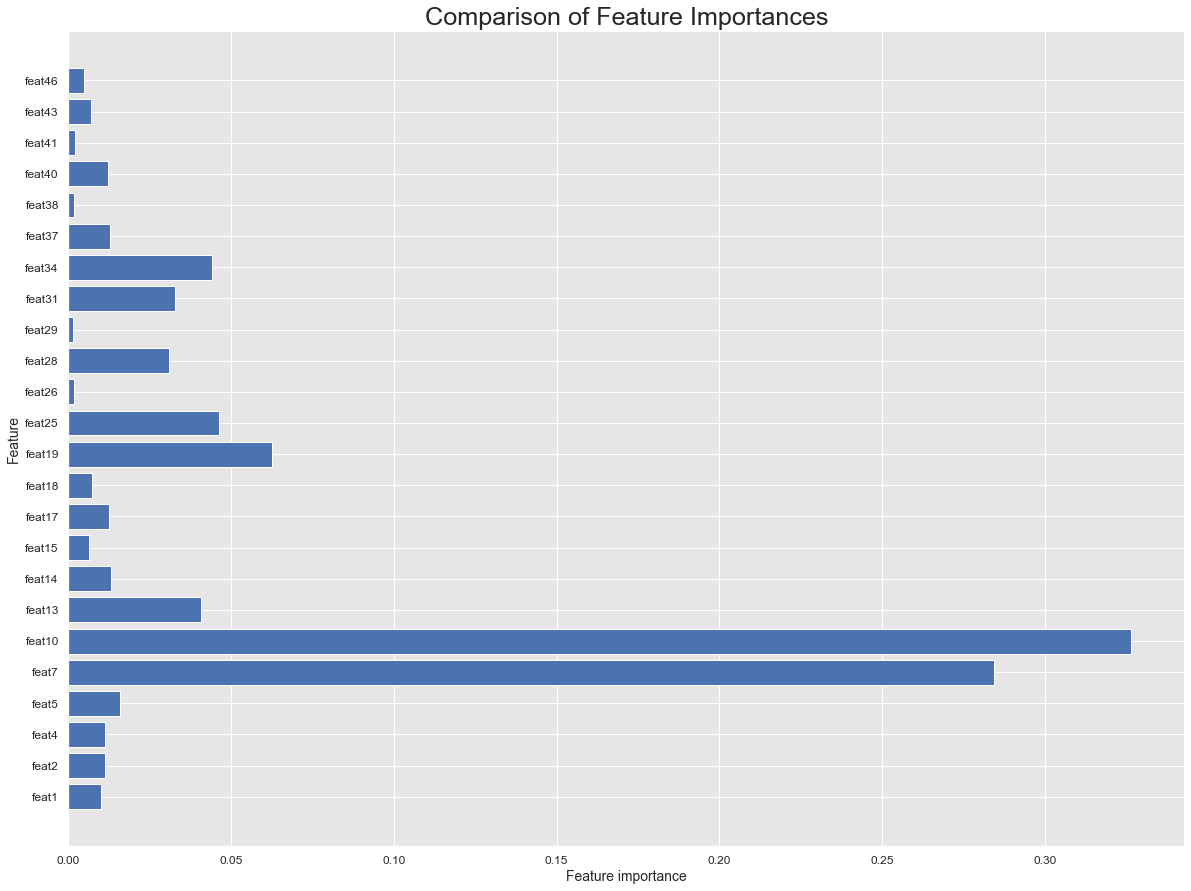

In [60]:
plot_feature_importances(rf_clf)

### Random Search - XGBoost Classifier 

I prefer XGBoost because it has its own regularization that prevents overfitting in addition to other advantages. 

I ran a lot of different models and grid searches before starting this random search. I didn't include them all. We can find the best combination after many iterations depending on the computational power. The parameters early_stopping_round and num_boost_round are useful to stop the process early. 

In [46]:
# clf = xgb.XGBClassifier(objective="multi:softmax") #multi:softmax is for multiclass classification
# param_grid = {
#     'silent': [False], 
#     'max_depth': [6, 10, 15, 20],
#     'learning_rate': [0.001, 0.01, 0.1, 0.2, 0, 3],
#     'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#     'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
#     'gamma': [0, 0.25, 0.5, 1.0],
#     'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
#     'n_estimators': [100]}
# RS_clf = RandomizedSearchCV(estimator=clf, param_distributions=param_grid,
#                             cv=5, n_jobs=-1)
# print("Randomized search..")
# search_time_start = time.time()

# RS_clf.fit(scaled_X_train, y_train)
# y_pred_train = RS_clf.predict(scaled_X_train)
# y_pred_test = RS_clf.predict(scaled_X_test)

# search_time_end = time.time()
# print('Time for randomized search in minutes: ',
#       round((search_time_end - search_time_start)/60))

In [47]:
# print("Best Parameter Combination Found During Random Search:\n ", RS_clf.best_params_)

Below are the best parameters of above random search. Because it is random search, it can give different parameters at the next run. I commented out the above cell, it takes 38 minutes to run the random search on <b> 
    
   my MacBook Pro 
       
       
  
  Processor 2.2 GHz Intel Core i7,     
  Memory: 16 GB 1600 MHz DDR3     
  Operation System: macOS Mojave</b>. 
  
 You can just uncomment and run the above cell if needed. 
 



    'subsample': 0.7, 

    'reg_lambda': 10.0, 

    'n_estimators': 100, 

    'min_child_weight': 3.0, 

    'max_depth': 20, 

    'learning_rate': 0.1, 

    'gamma': 0, 

    'colsample_bytree': 0.9

### Final XGBoost Model 

In [62]:
clf = xgb.XGBClassifier(objective='multi:softmax', nthread=4, scale_pos_weight=3,
                        colsample_bytree=0.9, gamma=0, learning_rate=0.1,
                        max_depth=20, min_child_weight=3, reg_lambda=10.0,
                        silent=False, subsample=0.7, seed=42, n_estimators=100)
search_time_start = time.time()
clf.fit(scaled_X_train, y_train)
y_pred_train = clf.predict(scaled_X_train)
y_pred_test = clf.predict(scaled_X_test)

search_time_end = time.time()
print('Time for the final XG Boost model in seconds: ',
      round(search_time_end - search_time_start))

Time for the final XG Boost model in seconds:  66


#### Model Evaluation Metrics

In [63]:
model_evaluation(scaled_X_train, scaled_X_test, y_train, y_test, y_pred_train, y_pred_test)

MODEL EVALUATION METRICS:
 -----------------------------------------------------
Train Set Accuracy Score 0.999808
Test Set Accuracy Score 0.998205
-----------------------------------------------------

Confusion Matrix for train & test set: 
 
Train set
 [[4245    0    0    0    0    0    0    0    0    0    0]
 [   0 4227    0    0    0    0    0    0    0    1    2]
 [   0    0 4275    0    0    0    0    0    0    0    0]
 [   0    0    0 4270    1    0    0    0    0    0    0]
 [   0    0    0    1 4252    0    0    0    0    0    0]
 [   0    0    0    0    0 4262    0    0    0    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    1    0    2    0    0    0 4287    0    0    0]
 [   1    0    0    0    0    0    0    0 4306    0    0]
 [   0    0    0    0    0    0    0    0    0 4247    0]
 [   0    0    0    0    0    0    0    0    0    0 4211]] 


Test set

[[1070    0    0    0    0    3    0    0    1    0    0]
 [   0 1087    0    0    0    0   

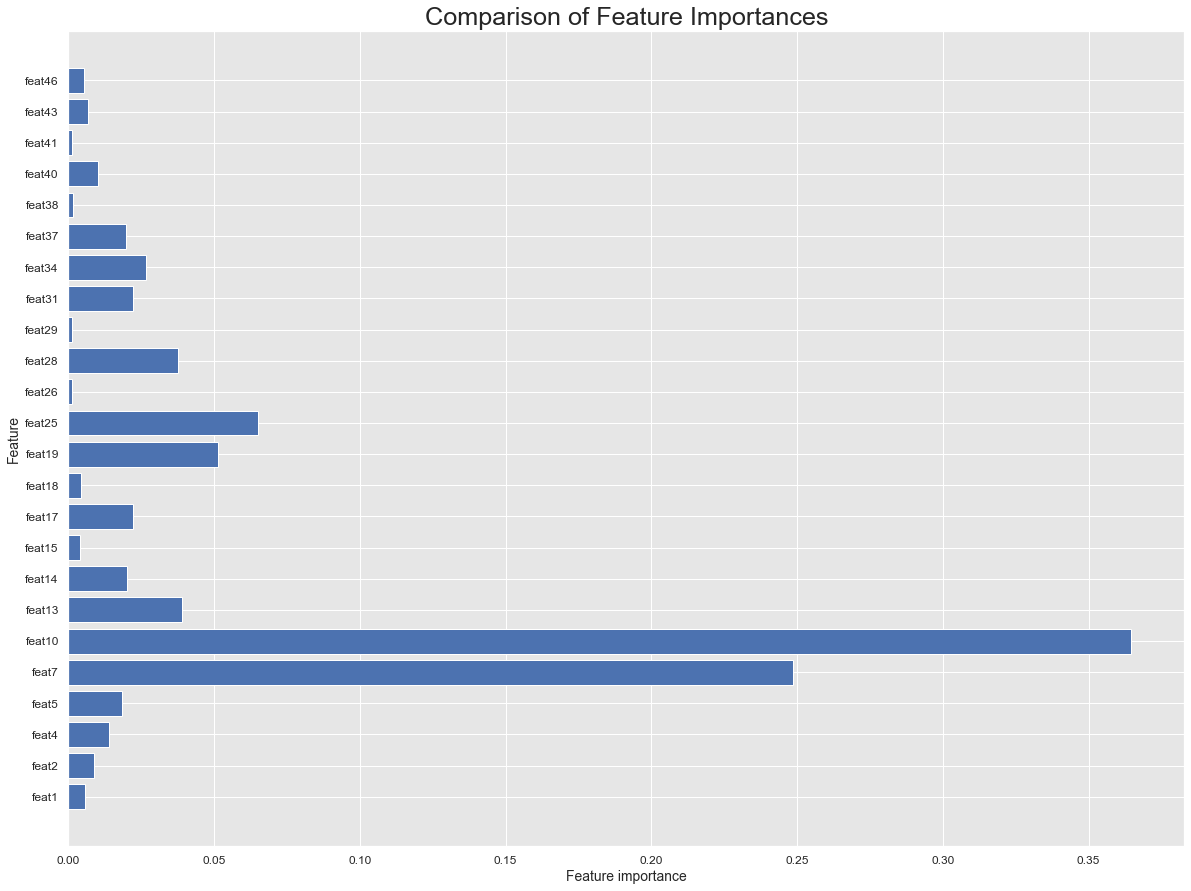

In [64]:
plot_feature_importances(clf)

### Multi Layer Perceptron Model

In [65]:
search_time_start = time.time()

print('Multi Layer Perceptron')

mlp = MLPClassifier(hidden_layer_sizes=(128, 128, 128, 128, 128, 128), activation='relu',
                    solver='adam', max_iter=200, verbose=True)
mlp.fit(X_train, y_train)
Y_train_mlp_pred_df = mlp.predict(X_train)
Y_valid_mlp_pred_df = mlp.predict(X_test)

search_time_end = time.time()
print('Time for the final MLP model in seconds: ',
      search_time_end - search_time_start)

Multi Layer Perceptron
Iteration 1, loss = 2.35223735
Iteration 2, loss = 1.48224262
Iteration 3, loss = 1.02492473
Iteration 4, loss = 0.92914836
Iteration 5, loss = 0.84894195
Iteration 6, loss = 0.81242292
Iteration 7, loss = 0.78182610
Iteration 8, loss = 0.72196348
Iteration 9, loss = 0.71961291
Iteration 10, loss = 0.68899347
Iteration 11, loss = 0.66718364
Iteration 12, loss = 0.67384211
Iteration 13, loss = 0.65038751
Iteration 14, loss = 0.65197657
Iteration 15, loss = 0.66795490
Iteration 16, loss = 0.62257521
Iteration 17, loss = 0.60962257
Iteration 18, loss = 0.61873846
Iteration 19, loss = 0.58402268
Iteration 20, loss = 0.55070000
Iteration 21, loss = 0.45351707
Iteration 22, loss = 0.37794440
Iteration 23, loss = 0.34213754
Iteration 24, loss = 0.36975172
Iteration 25, loss = 0.29278610
Iteration 26, loss = 0.27155215
Iteration 27, loss = 0.27178627
Iteration 28, loss = 0.26392654
Iteration 29, loss = 0.27538586
Iteration 30, loss = 0.22697171
Iteration 31, loss = 0.207

#### MLP Model Results

In [66]:
cm_mlp_train = confusion_matrix(y_train, Y_train_mlp_pred_df)
print(cm_mlp_train)
mlp_train_accuracy = cm_mlp_train.trace()/cm_mlp_train.sum()

print('MLP accuracy on a train set is: ', round(mlp_train_accuracy, 6))
print(60*'-')

cm_mlp = confusion_matrix(y_test, Y_valid_mlp_pred_df)
print(cm_mlp)
mlp_test_accuracy = cm_mlp.trace()/cm_mlp.sum()

print('MLP accuracy on a test set is: ', round(mlp_test_accuracy, 6))


[[4172    0    0    0    0   70    0    0    3    0    0]
 [   0 4109    0    0    0    1    0    0    0  120    0]
 [   0    1 4262    2    8    0    0    0    2    0    0]
 [   0    0    2 4260    4    0    0    0    1    4    0]
 [   0    0   63    4 4154    0    0   31    0    1    0]
 [  40    0    2    0    0 4116    0    0  104    0    0]
 [   0    0    0    0    0    0 4216    0    0    0    0]
 [   0    1    7    0   39    5    0 4236    2    0    0]
 [   7   14    0    0    0   13    0    0 4273    0    0]
 [   0   66    0    0    0    0    0    0    0 4181    0]
 [   0    0    0    0    0    0    0    0    1    0 4210]]
MLP accuracy on a train set is:  0.986797
------------------------------------------------------------
[[1049    0    0    0    0   24    0    0    1    0    0]
 [   0 1050    0    0    1    0    0    0    0   37    1]
 [   0    1 1033    2    6    0    0    1    0    1    0]
 [   0    0    1 1041    4    0    0    0    1    1    0]
 [   0    0   19    1 1036

## Conclusion

According to the above results <b> test accuracies </b> of the main models are:

Random Forest Model 0.998205

XGBoost Model 0.998035: 

MLP Model 0.982225

These numbers can be increased by hypertuning more parameters. 

Random Forest and XGBoost gives very similar results. Although one is bagging, one is boosting, they both are tree based models. 

<b> Feature importances: </b>

Features 7 and 10 are the most important ones. 19, 25, 28, 31, 34, 37 also have some importance. The other features are not very important. 

